# Imports
Include all the necessary imports to create, train, and evaluate the digit classifier using the `TensorFlow` library which provides high-level APIs to create deep learning models. Use matplotlib to visualize data and training results.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Downloading and Preprocessing the Dataset
Download the MNIST dataset - a large database of handwritten digits commonly used for training and testing in the field of machine learning.

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape, Y_train.shape)

(60000, 28, 28) (60000,)


# Exploratory Data Analysis
It's always a good idea to visualize the data before we feed it into our model. In this part, we will display some images from the dataset using matplotlib.

In [4]:
def display_image(image, label):
    """
    Display a single image and its label.

    Args:
    image (numpy.ndarray): Image to display. Expected shape is (width, height)
    label (int): Label of the image.
    
    Matplotlib settings:
        cmap=plt.cm.binary sets the colormap to 'binary', which will display the image in grayscale - assuming that the
        image is a grayscale image.
    """
    
    plt.figure()
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.grid(False)
    plt.show()

In [11]:
def display_images(images, labels, num_images=25):
    """
    Display the first num_images in the provided dataset.
        
    Args:
    images (numpy.ndarray): Image dataset. Expected shape is (num_samples, width, height)
    labels (numpy.ndarray): Corresponding labels. Expected shape is (num_samples,)
    num_images (int, optional): Number of images to display. Defaults to 25.

    Matplotlib settings:
        - plt.figure(figsize=(10, 10)): create a new figure with figure size of 10x10 inches.
        - plt.subplot(10,5,i+1): add a new subplot to the figure. The figure will be a grid of 10 rows and
            5 columns of subplots. i+1 is the index of the current subplot.
        - plt.xticks([]), plt.yticks([]): remove the x and y axis tick marks from the current subplot.
        - plt.tight_layout(): adjust the subplot params so that the subplots fit into the figure area nicely. 
            It's often used when the subplots are overlapping each other.
    """

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(10,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.tight_layout()
    plt.show()

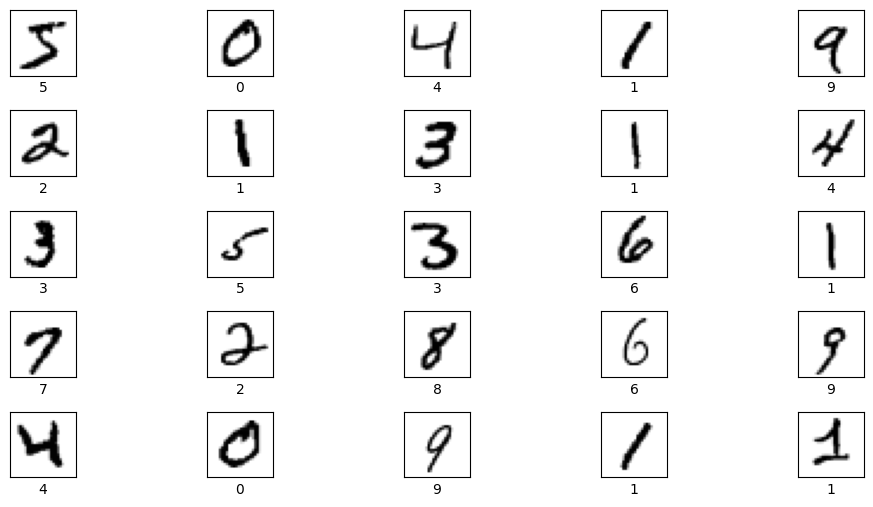

In [12]:
display_images(X_train, Y_train)

# Model Creation
Define the architecture of our deep learning model. We're going to use a simple neural network with three hidden dense layers with 25, 15, and 10 units respectively.

In the case of the MNIST dataset, each input is a 28x28 pixel image. This can be represented as a 2D array (or matrix) of size 28x28, where each entry in the matrix corresponds to the grayscale intensity of a specific pixel.

However, when you pass this data to a fully connected layer (also known as a Dense layer in TensorFlow), the layer expects each input to be a 1-dimensional array (or vector) rather than a 2D array. This is because a Dense layer connects every input node to every output node, which doesn't make sense for a 2D input.

So, what the Flatten layer does is it transforms the 2D array of size 28x28 into a 1D array of size 784 (since 28*28 = 784). In other words, it "flattens" the 2D array into a 1D array by placing each row of pixels from the original image end-to-end. This transformed, or "flattened", data can then be passed into the Dense layer.

In [44]:
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
    ], name = 'digit_classifier'
)

In [45]:
model.summary()

Model: "digit_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 25)                19625     
                                                                 
 dense_4 (Dense)             (None, 15)                390       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
[_, layer1, layer2, layer3] = model.layers

In [48]:
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


# Training the Model
Compile and train the model using the training data. Specify the optimizer, loss function, and metrics to use.

In [50]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2588 - accuracy: 0.6204
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6788 - accuracy: 0.7889
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5565 - accuracy: 0.8355
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4811 - accuracy: 0.8611
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4351 - accuracy: 0.8768
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4067 - accuracy: 0.8848
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3872 - accuracy: 0.8902
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3711 - accuracy: 0.8950
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3571 - accuracy: 0.8991
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.344

In [51]:
def plot_training_history(history):
    """
    Plots the training history. 
    Expects a history object as returned by the fit() method of a tensorflow.keras.Model.

    Args:
    history (History): History object as returned by the fit() method of a tensorflow.keras.Model.
    
    Matplotlib settings:
        - plt.subplot(1, 2, 1): specifies that we are going to have 1 row and 2 columns of plots (i.e., subplots) 
            in the figure, and that the current plot is the first one. This first subplot is for the accuracy values.
        - plt.subplot(1, 2, 2): specifies that the current plot is the second subplot. 
            This second subplot is for the loss values.
    """
    
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    try:
        plt.plot(history.history['val_accuracy'])
    except KeyError:
        pass
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    try:
        plt.plot(history.history['val_loss'])
    except KeyError:
        pass
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

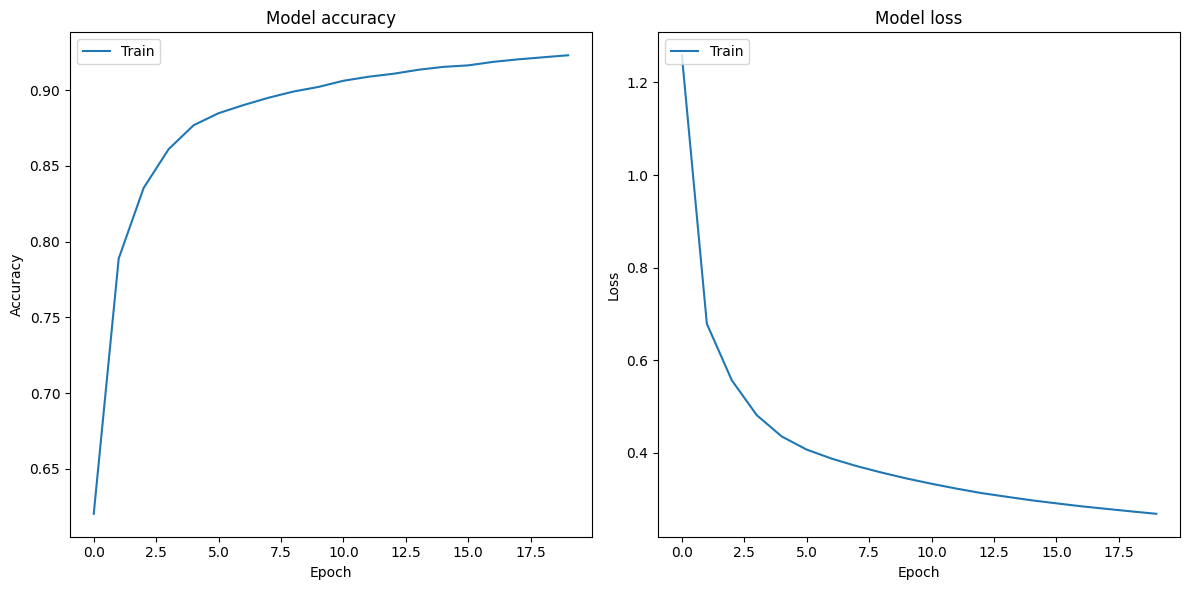

In [52]:
plot_training_history(history)

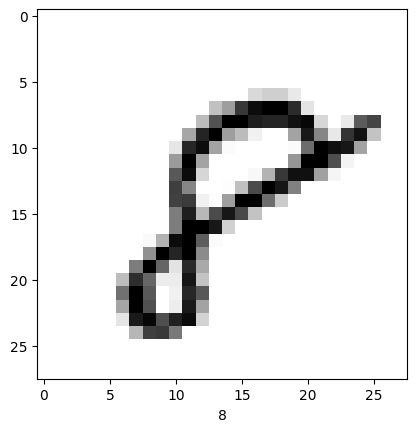

In [60]:
image_of_8, label_of_8 = X_train[-1], Y_train[-1]
display_image(image_of_8, label_of_8)

# Predictions

In [61]:
prediction = model.predict(image_of_8.reshape(1,28,28))
print(f"Predicting a 5: \n{prediction}")
print(f"Largest prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 44ms/step
Predicting a 5: 
[[ -1.5709436 -14.752918   -3.6078212  -3.0267444  -7.3532615  -1.0674663
   -8.373705   -6.767112    2.3557155  -2.1767888]]
Largest prediction index: 8


In [62]:
prediction_p = tf.nn.softmax(prediction)

print(f"Predicting a 5. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

Predicting a 5. Probability vector: 
[[1.8412596e-02 3.4694168e-08 2.4016534e-03 4.2940681e-03 5.6739616e-05
  3.0462984e-02 2.0450938e-05 1.0196421e-04 9.3420333e-01 1.0046156e-02]]
Total of predictions: 1.000


In [63]:
yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 8


In [68]:
def display_predictions(model, images, labels):
    """
    Displays a grid of images with their actual and predicted labels.

    Args:
    model (Model): Trained keras model.
    images (np.array): Array of images.
    labels (np.array): Array of true labels.
    
    Matplotlib settings:
        - fig, axes = plt.subplots(5, 5, figsize=(20,20)): creates a 5x5 grid of subplots with a figure size of 20x20 units.
            It returns a figure and a 2D array of Axes objects (subplots)
    """
    
    # Predict the labels for the images
    predictions = model.predict(images[:25])

    # Create a grid of subplots
    fig, axes = plt.subplots(5, 5, figsize=(20,20))

    for i, ax in enumerate(axes.flat):
        # Plot image
        ax.imshow(images[i], cmap='gray')

        # Get the predicted and true labels for the image
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i]

        # Set the title for the image
        ax.set_title(f"\nTrue: {true_label}\nPredicted: {predicted_label}")

        # Hide axis
        ax.axis('off')

    # Display the figure
    plt.show()

1/1 [==============================] - 0s 38ms/step


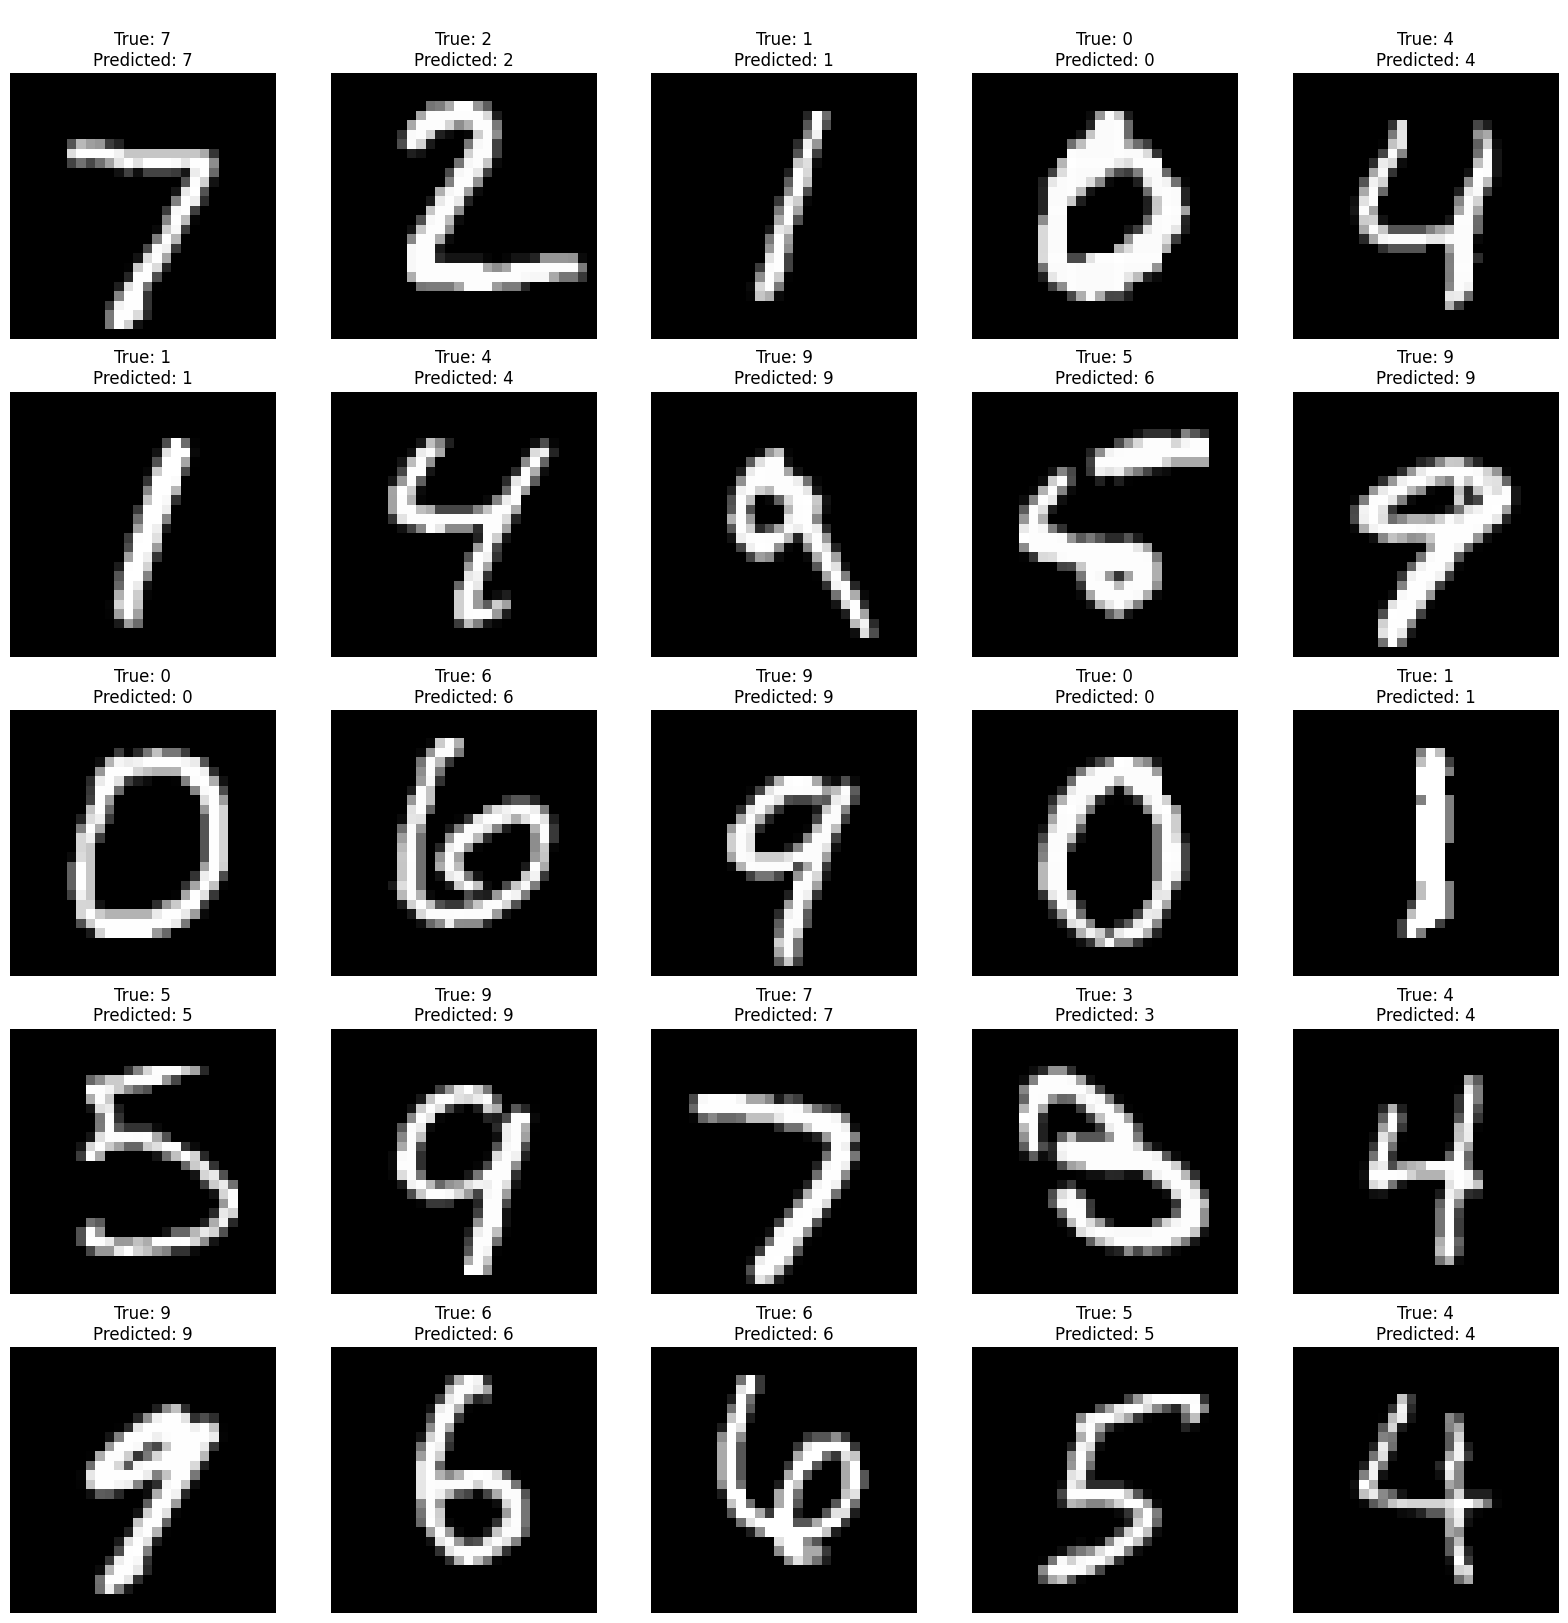

In [69]:
display_predictions(model, X_test, Y_test)

# Evaluating the Model
Once the model is trained, evaluate its performance on the test data. This gives us an estimate of how well our model would perform on unseen data.

In [70]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2683 - accuracy: 0.9232 - 872ms/epoch - 3ms/step

Test accuracy: 0.9232000112533569
